# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Чтение-файла" data-toc-modified-id="Чтение-файла-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Чтение файла</a></span></li><li><span><a href="#Предобработка-пропусков" data-toc-modified-id="Предобработка-пропусков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка пропусков</a></span></li><li><span><a href="#Очистка-таблицы-от-излишних-значений" data-toc-modified-id="Очистка-таблицы-от-излишних-значений-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Очистка таблицы от излишних значений</a></span></li><li><span><a href="#Подготовка-массивов-для-дальнейшей-работы" data-toc-modified-id="Подготовка-массивов-для-дальнейшей-работы-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Подготовка массивов для дальнейшей работы</a></span></li><li><span><a href="#ПРОМЕЖУТОЧНЫЕ-ВЫВОДЫ:" data-toc-modified-id="ПРОМЕЖУТОЧНЫЕ-ВЫВОДЫ:-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>ПРОМЕЖУТОЧНЫЕ ВЫВОДЫ:</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследование-баланса-классов" data-toc-modified-id="Исследование-баланса-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование баланса классов</a></span></li><li><span><a href="#Изучение-модели-без-учёта-дисбаланса" data-toc-modified-id="Изучение-модели-без-учёта-дисбаланса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучение модели без учёта дисбаланса</a></span></li><li><span><a href="#ВЫВОДЫ-ПО-РЕЗУЛЬТАТАМ-ИССЛЕДОВАНИЯ" data-toc-modified-id="ВЫВОДЫ-ПО-РЕЗУЛЬТАТАМ-ИССЛЕДОВАНИЯ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>ВЫВОДЫ ПО РЕЗУЛЬТАТАМ ИССЛЕДОВАНИЯ</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Изучение-автобалансировки-моделей" data-toc-modified-id="Изучение-автобалансировки-моделей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изучение автобалансировки моделей</a></span></li><li><span><a href="#Исследование-UPSAMPLE" data-toc-modified-id="Исследование-UPSAMPLE-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Исследование UPSAMPLE</a></span></li><li><span><a href="#Исследование-DOWNSAMPLE" data-toc-modified-id="Исследование-DOWNSAMPLE-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Исследование DOWNSAMPLE</a></span></li><li><span><a href="#ВЫВОДЫ-ПО-РЕЗУЛЬТАТАМ-БОРЬБЫ-С-ДИСБАЛАНСОМ" data-toc-modified-id="ВЫВОДЫ-ПО-РЕЗУЛЬТАТАМ-БОРЬБЫ-С-ДИСБАЛАНСОМ-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>ВЫВОДЫ ПО РЕЗУЛЬТАТАМ БОРЬБЫ С ДИСБАЛАНСОМ</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

In [1]:
# импорт библиотек для работы с данными
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# импорт моделей
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# импорт метрик
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve

In [4]:
# импорт утилит
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [5]:
# импорт классов и пайплайнов
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Подготовка данных

### Чтение файла

In [6]:
df = pd.read_csv('/datasets/Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<b> Из предварительного изучения данных, видим:</b>
 - типы данных соответствуют описанию данных;
 - есть пропуски в столбце Tenure (сколько лет человек обслуживается банком);
 - столбец RowNumber, CustomerId и Surname - избыточный (информационной нагрузки не несёт).

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<b>Видим значительный разброс значений, что потребует масштабирования.

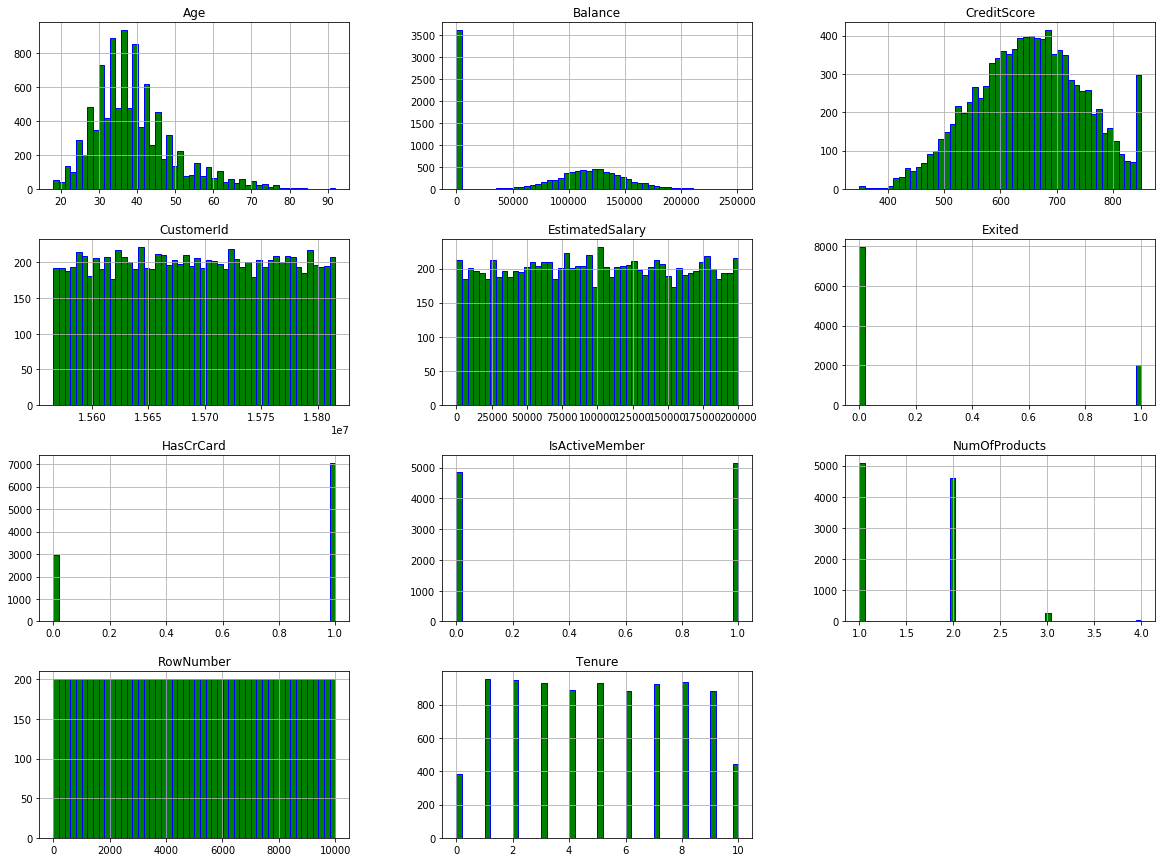

In [9]:
df.hist(bins=50, figsize=(20,15), color='green', edgecolor='blue', linewidth=1)
plt.show()

### Предобработка пропусков

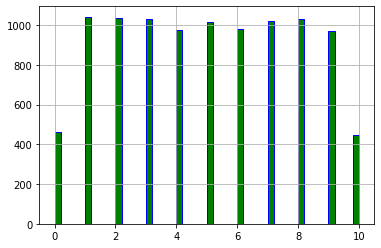

In [10]:
# Пропущенные значения вынуждены заполнить случайными значениями,
# чтобы минимизировать искажение данных при дальнейшем моделировании.
df.loc[df['Tenure'].isna(),'Tenure']=(np.random.randint(0,10,size=df['Tenure'].isna().sum()))
df['Tenure'].hist(bins=50, color='green', edgecolor='blue', linewidth=1)
plt.show()
# После обработки видим,что гистограмма изменилась незначительно.

### Очистка таблицы от излишних значений

Столбцы RowNumber (индекс строки в данных), CustomerId (уникальный идентификатор клиента) и Surname (фамилия) не несут аналитического смысла, т.к. не влияют на лояльность клиентов.

In [11]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


###  Подготовка массивов для дальнейшей работы

In [12]:
# Создание датафрейма по методу прямого кодирования с защитой от дамми-ловушки.
df_one = pd.get_dummies(df, drop_first=True)
df_one.info()

numeric = ['CreditScore','Age','Balance','NumOfProducts','EstimatedSalary','Tenure']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null float64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
Gender_Male          10000 non-null uint8
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


In [13]:
# Выполним разделение выборки на обучающу валидационную и тестовую
features = df_one.drop(['Exited'], axis = 1)
target = df_one['Exited']

# Получение пропорции 60(тренировочная):40
features_train, features_40, target_train, target_40 = train_test_split(
    features, target, test_size = 0.40, random_state = 12345)

# Разделение 40% на валидационную и тестовую в соотношении 50/50
features_valid, features_test, target_valid, target_test = train_test_split(
    features_40, target_40, test_size = 0.50, random_state = 12345)

In [14]:
# Отключение предупреждения компилятора
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Масштабирование признаков

numeric = ['CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Комментарий: Для дальнейшей работы с данными, мы разделили их в пропорции 60:20:20 (train/valid/test), а также отмасштабировали их при помощи класса StandardScaler.

<b> Данные готовы к исследованию

### ПРОМЕЖУТОЧНЫЕ ВЫВОДЫ:

1) Пропуски заполнены случайными значениями, что в целом незначительно повлияло на качество данных.

2) Для уменьшения нагрузки при обработке данных, лишние столбцы были исключены из таблиц.

3) Большой разброс значений потребовал масштабирования признаков.

4) Обнаружены выбросы, которые необходимо изучить подробнее:
 - данные признака credit_score ограничены по правой стороне, что может быть проблемой для алгоритмов МО.
 - данные признака balance ограничены по левой стороне, что может быть проблемой для алгоритмов МО.
 - признаки credit_score, age, tenure, balance стремятся к колоколообразному распределнию для целей МО.
 - форма распределения признака tenure позволяет предложить заполнение пустых значений средним значением распределения.
 
 
numeric = ['CreditScore','Age','Balance','NumOfProducts','EstimatedSalary','Tenure']

## Исследование задачи

### Исследование баланса классов

In [15]:
# Проверим, как часто в наших исходных данных указано клиент
# ушел(1) или нет(0):

ex = df['Exited'].value_counts(normalize=True)
ex

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Соотношение очень неравномерно: 4:1.

### Изучение модели без учёта дисбаланса

При исследовании модели без учета дисбаланса классов, заведомо ожидаем плохие результаты.

Часть данных - категориальные. 

Для обучения модели логистической регрессии потребуется преобразовать категориальные признаки прямым кодированием.

Для обучения модели решающего дерева или случайного леса выполним порядковое кодирование.

<b> Для исследования будем использовать следующие модели:
 - Логистическая регрессия
 - Случайный лес
 - Решающее дерево

In [16]:
# Логистическая регрессия
model =  LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Для ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ лучший результат F1 =', f1_score(target_valid, predicted_valid))

Для ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ лучший результат F1 = 0.33389544688026984


In [17]:
# Случайный лес
f1=0
es = 0
t_v = 0
p_v = 0
for estimator in range(1, 100, 1):
    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    if f1_score(target_valid, predicted_valid)>f1:
        f1 = f1_score(target_valid, predicted_valid)
        es = estimator
        t_v = target_valid
        p_v = predicted_valid

print('Для CЛУЧАЙНОГО ЛЕСА лучший результат при оценке', es,': F1 = ', f1_score(t_v, p_v))

Для CЛУЧАЙНОГО ЛЕСА лучший результат при оценке 43 : F1 =  0.6041666666666667


In [18]:
# Решающее дерево
f1=0
depth_m = 0
t_v = 0
p_v = 0
for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)

    predicted_valid = model.predict(features_valid)
    if f1_score(target_valid, predicted_valid)>f1:
        f1 = f1_score(target_valid, predicted_valid)
        depth_m = depth
        t_v = target_valid
        p_v = predicted_valid
    
    
print('Для РЕШАЮЩЕГО ДЕРЕВА лучший результат при максимальной глубине', depth_m,': F1 = ', f1_score(t_v, p_v))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Для РЕШАЮЩЕГО ДЕРЕВА лучший результат при максимальной глубине 9 : F1 =  0.5714285714285715


Проведем оценку accuracy, precision и recall, также покажем F-метрику.

ЛОГИСТИЧЕСКАЙ РЕГРЕССИЯ
Точность попадания по классам 0.8025
Precision 0.5657142857142857
Recall 0.23684210526315788
F1 0.33389544688026984
AUC-ROC Логистической регрессии 0.7589554134733454

СЛУЧАЙНЫЙ ЛЕС
Точность попадания по классам 0.859
Precision 0.7556390977443609
Recall 0.48086124401913877
F1 0.587719298245614
AUC-ROC Случайного леса 0.8295454545454546

РЕШАЮЩЕЕ ДЕРЕВО
Точность попадания по классам 0.8485
Precision 0.698961937716263
Recall 0.48325358851674644
F1 0.5714285714285715
AUC-ROC Решающего дерева 0.7793901487427338


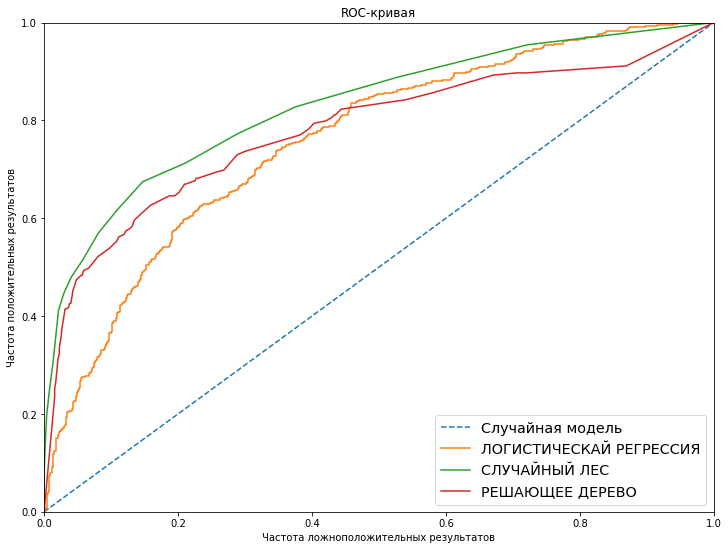

In [19]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('ЛОГИСТИЧЕСКАЙ РЕГРЕССИЯ')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC Логистической регрессии',auc_roc)
plt.plot(fpr, tpr, label='ЛОГИСТИЧЕСКАЙ РЕГРЕССИЯ')
print()

model = RandomForestClassifier(random_state=12345, n_estimators=19)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('СЛУЧАЙНЫЙ ЛЕС')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC Случайного леса',auc_roc)
plt.plot(fpr, tpr, label='СЛУЧАЙНЫЙ ЛЕС')
print()

model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('РЕШАЮЩЕЕ ДЕРЕВО')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC Решающего дерева',auc_roc)
plt.plot(fpr, tpr, label='РЕШАЮЩЕЕ ДЕРЕВО')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("Частота ложноположительных результатов")
plt.ylabel("Частота положительных результатов")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

По результатам видно, что метрика f1 и AUC-ROC лучшая на модели СЛУЧАЙНЫЙ ЛЕС.

### ВЫВОДЫ ПО РЕЗУЛЬТАТАМ ИССЛЕДОВАНИЯ

В данных сущестует дисбаланс классов в отношении 1:4, что возможно влияет на качество изучаемых моделей.

Все модели имеют recall ниже, чем percision, из-за перекоса данных, что в свою очередь влияет на F-меру.

## Борьба с дисбалансом

### Изучение автобалансировки моделей

ЛОГИСТИЧЕСКАЙ РЕГРЕССИЯ
Точность попадания по классам 0.702
Precision 0.3810160427807487
Recall 0.6818181818181818
F1 0.4888507718696398
AUC-ROC Логистической регрессии 0.7639351798643834

СЛУЧАЙНЫЙ ЛЕС
Точность попадания по классам 0.8535
Precision 0.7323420074349443
Recall 0.47129186602870815
F1 0.5735080058224163
AUC-ROC Случайного леса 0.823212244206655

РЕШАЮЩЕЕ ДЕРЕВО
Точность попадания по классам 0.77
Precision 0.46464646464646464
Recall 0.6602870813397129
F1 0.5454545454545454
AUC-ROC Решающего дерева 0.7658647826323652


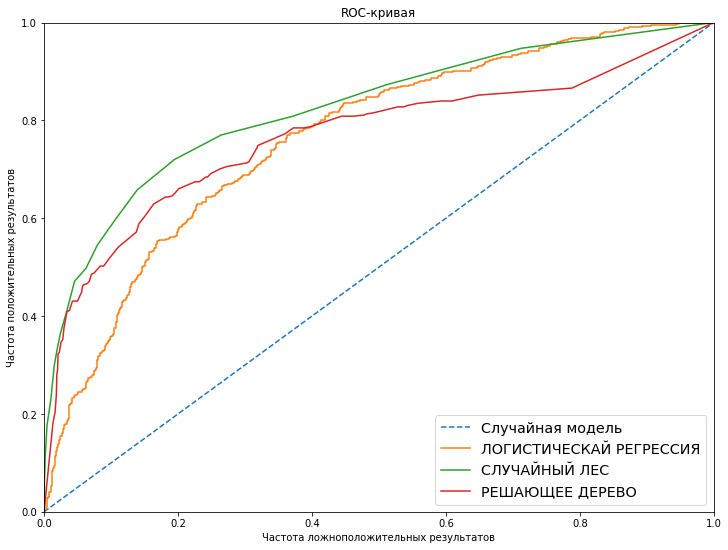

In [20]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('ЛОГИСТИЧЕСКАЙ РЕГРЕССИЯ')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC Логистической регрессии',auc_roc)
plt.plot(fpr, tpr, label='ЛОГИСТИЧЕСКАЙ РЕГРЕССИЯ')
print()

model = RandomForestClassifier(random_state=12345, n_estimators=19, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('СЛУЧАЙНЫЙ ЛЕС')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC Случайного леса',auc_roc)
plt.plot(fpr, tpr, label='СЛУЧАЙНЫЙ ЛЕС')
print()

model = DecisionTreeClassifier(random_state=12345, max_depth=9, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('РЕШАЮЩЕЕ ДЕРЕВО')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC Решающего дерева',auc_roc)
plt.plot(fpr, tpr, label='РЕШАЮЩЕЕ ДЕРЕВО')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("Частота ложноположительных результатов")
plt.ylabel("Частота положительных результатов")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

<b> На данном этапе </b> видно, что значительно улучшелись показатели в Логистической регрессии, но ухудгились в Решающем дереве

### Исследование UPSAMPLE

In [21]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(target_upsampled.value_counts())

0    4804
1    4784
Name: Exited, dtype: int64


ЛОГИСТИЧЕСКАЙ РЕГРЕССИЯ
Точность попадания по классам 0.7025
Precision 0.3815261044176707
Recall 0.6818181818181818
F1 0.4892703862660944
AUC-ROC Логистической регрессии 0.7638610806985282

СЛУЧАЙНЫЙ ЛЕС
Точность попадания по классам 0.8415
Precision 0.6438746438746439
Recall 0.5406698564593302
F1 0.58777633289987
AUC-ROC Случайного леса 0.829119006284819

РЕШАЮЩЕЕ ДЕРЕВО
Точность попадания по классам 0.77
Precision 0.46452702702702703
Recall 0.6578947368421053
F1 0.5445544554455446
AUC-ROC Решающего дерева 0.7647911008414036


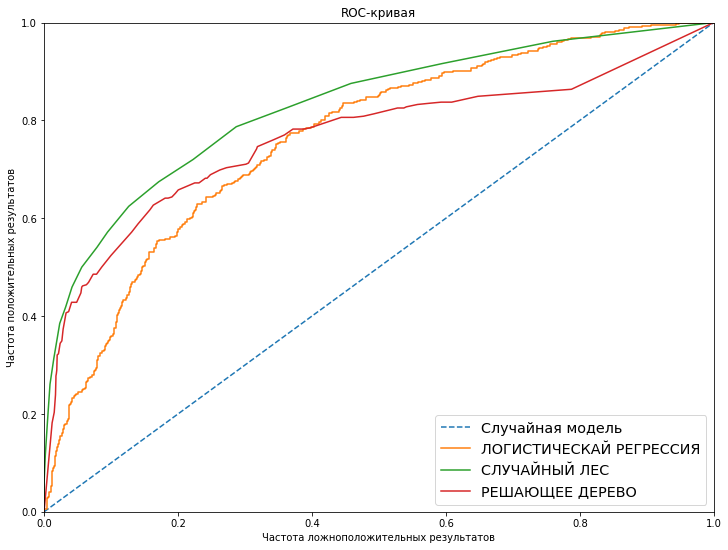

In [22]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('ЛОГИСТИЧЕСКАЙ РЕГРЕССИЯ')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC Логистической регрессии',auc_roc)
plt.plot(fpr, tpr, label='ЛОГИСТИЧЕСКАЙ РЕГРЕССИЯ')
print()

model = RandomForestClassifier(random_state=12345, n_estimators=19)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('СЛУЧАЙНЫЙ ЛЕС')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC Случайного леса',auc_roc)
plt.plot(fpr, tpr, label='СЛУЧАЙНЫЙ ЛЕС')
print()

model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('РЕШАЮЩЕЕ ДЕРЕВО')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC Решающего дерева',auc_roc)
plt.plot(fpr, tpr, label='РЕШАЮЩЕЕ ДЕРЕВО')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("Частота ложноположительных результатов")
plt.ylabel("Частота положительных результатов")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

<b> На данном этапе</b> видно, что значительно улучшились показатели в Случайном лесу

### Исследование DOWNSAMPLE

In [23]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(target_downsampled.value_counts())

0    1201
1    1196
Name: Exited, dtype: int64


ЛОГИСТИЧЕСКАЙ РЕГРЕССИЯ
Точность попадания по классам 0.7005
Precision 0.37720488466757124
Recall 0.6650717703349283
F1 0.48138528138528136
AUC-ROC Логистической регрессии 0.7617500105855952

СЛУЧАЙНЫЙ ЛЕС
Точность попадания по классам 0.7665
Precision 0.4628224582701062
Recall 0.7296650717703349
F1 0.5663881151346332
AUC-ROC Случайного леса 0.8258896436586236

РЕШАЮЩЕЕ ДЕРЕВО
Точность попадания по классам 0.732
Precision 0.4169014084507042
Recall 0.7081339712918661
F1 0.524822695035461
AUC-ROC Решающего дерева 0.7624342936988489


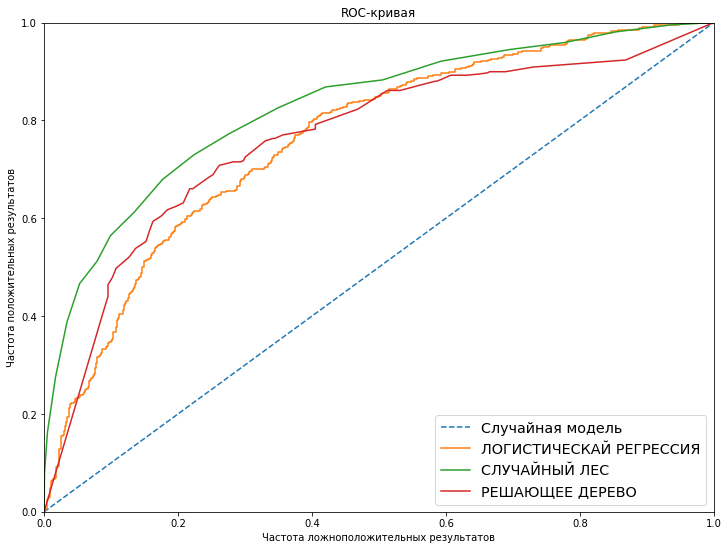

In [24]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('ЛОГИСТИЧЕСКАЙ РЕГРЕССИЯ')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC Логистической регрессии',auc_roc)
plt.plot(fpr, tpr, label='ЛОГИСТИЧЕСКАЙ РЕГРЕССИЯ')
print()

model = RandomForestClassifier(random_state=12345, n_estimators=19)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('СЛУЧАЙНЫЙ ЛЕС')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC Случайного леса',auc_roc)
plt.plot(fpr, tpr, label='СЛУЧАЙНЫЙ ЛЕС')
print()

model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('РЕШАЮЩЕЕ ДЕРЕВО')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print('AUC-ROC Решающего дерева',auc_roc)
plt.plot(fpr, tpr, label='РЕШАЮЩЕЕ ДЕРЕВО')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("Частота ложноположительных результатов")
plt.ylabel("Частота положительных результатов")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

### ВЫВОДЫ ПО РЕЗУЛЬТАТАМ БОРЬБЫ С ДИСБАЛАНСОМ

Дисбаланс повлиял на модель в худшую сторону. 

Лучшим решением стало увеличение классов 1 (upsample) в тренировочной выборке.

Выравние классов в выборке привело к резкому росту параметра recall и небольшому понижению percison.
В целом F-мера выросла.

## Тестирование модели

К тестовой выборке примем модель Случайного леса.

Исследуем гиперпараметры и улучшим F-меру модели.

Начнем с гиперпараметра n_estimators.

In [25]:
f1=0
es = 0
t_v = 0
p_v = 0
for estimator in range(1, 200, 1):
    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    if f1_score(target_valid, predicted_valid)>f1:
        f1 = f1_score(target_valid, predicted_valid)
        es = estimator
        t_v = target_valid
        p_v = predicted_valid

print('Для CЛУЧАЙНОГО ЛЕСА лучший результат при оценке', es,': F1 = ', f1_score(t_v, p_v))

Для CЛУЧАЙНОГО ЛЕСА лучший результат при оценке 127 : F1 =  0.6094986807387863


In [30]:
model =  RandomForestClassifier(random_state=12345, n_estimators=127, criterion='entropy')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('F1', f1_score(target_valid, predicted_valid))

F1 0.6111833550065019


In [27]:
s_s = 0
f1 = 0
for samples_split in range(2, 11):
    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator, min_samples_split=samples_split)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    if f1_score(target_valid, predicted_valid)>f1:
        f1 = f1_score(target_valid, predicted_valid)
        s_s = samples_split
print('Разделение образцов', s_s,'F1', f1)

Разделение образцов 8 F1 0.6223337515683814


In [31]:
s_l = 0
f1 = 0
for samples_leaf in range(1, 11):
    model =  RandomForestClassifier(random_state=12345, n_estimators=estimator, min_samples_split=8, min_samples_leaf=samples_leaf)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    if f1_score(target_valid, predicted_valid)>f1:
        f1 = f1_score(target_valid, predicted_valid)
        s_l = samples_split
print('Образцы листа', s_l,'F1', f1)

Образцы листа 10 F1 0.630901287553648


<b> Испытаем на тестовой выборке четыре модели:
    
    - на дисбалансных данных 
    
    - сбалансированных данных (со взвешенными классами, усечением 0 класса и расширением класса 1)

AUC-ROC Случайный лес - дисбаланс классов 0.8564695512171868
Случайный лес - дисбаланс классов
Точность попадания по классам 0.845
Precision 0.7627906976744186
Recall 0.3877068557919622
F1 0.5141065830721003

AUC-ROC Случайный лес - сбалансированные классы 0.8580690811023115
Случайный лес - сбалансированные классы
Точность попадания по классам 0.8195
Precision 0.5607843137254902
Recall 0.6761229314420804
F1 0.6130760986066452

AUC-ROC Случайный лес - downsample 0.8468948582684603
Случайный лес - downsample
Точность попадания по классам 0.77
Precision 0.47234678624813153
Recall 0.7470449172576832
F1 0.5787545787545787

AUC-ROC Случайный лес - upsample 0.8567303930166353
Случайный лес - upsample
Точность попадания по классам 0.8185
Precision 0.5570342205323194
Recall 0.6926713947990544
F1 0.6174920969441517



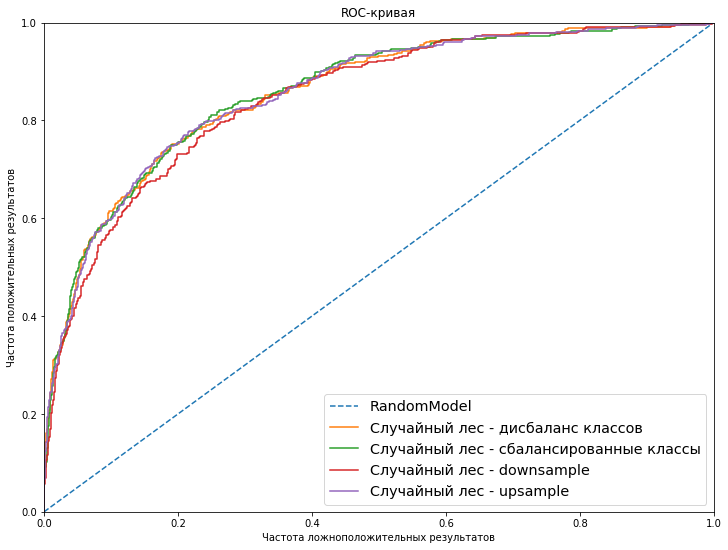

In [32]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


model = RandomForestClassifier(random_state=12345, n_estimators=estimator, min_samples_split=8, min_samples_leaf=10)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC Случайный лес - дисбаланс классов',auc_roc)
print('Случайный лес - дисбаланс классов')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()
plt.plot(fpr, tpr, label='Случайный лес - дисбаланс классов')


model = RandomForestClassifier(random_state=12345, n_estimators=estimator, min_samples_split=8, min_samples_leaf=10, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC Случайный лес - сбалансированные классы',auc_roc)
print('Случайный лес - сбалансированные классы')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()
plt.plot(fpr, tpr, label='Случайный лес - сбалансированные классы')



model = RandomForestClassifier(random_state=12345, n_estimators=estimator, min_samples_split=9,
                                   min_samples_leaf=10)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC Случайный лес - downsample',auc_roc)
print('Случайный лес - downsample')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()
plt.plot(fpr, tpr, label='Случайный лес - downsample')



model = RandomForestClassifier(random_state=12345, n_estimators=estimator, min_samples_split=8, min_samples_leaf=10)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC Случайный лес - upsample',auc_roc)
print('Случайный лес - upsample')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()
plt.plot(fpr, tpr, label='Случайный лес - upsample')


plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("Частота ложноположительных результатов")
plt.ylabel("Частота положительных результатов")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

### Вывод

2 из 4 моделей достигли искомой F-меры на тестовых данных:
- модель сбалансированного Случайного леса 
- модель с увеличенным количеством класса 1.

Оценивая адеватность модели видно, что AUC-ROC дисбалансной модели и модели с весами примерно одинаково эффективно предсказывают вероятность ухода клиента.

В результате исследования самые лучшие показатели получены на модели СБАЛАНСИРОВАННОГО СЛУЧАЙНОГО ЛЕСА

## Итоговый вывод

Для выполнения поставленных задач по пожготовке модели, предсказывающей уход клиентов было проанализировано несколько вариантов построения модели.

Данные были разделены и обработаны.

Получена улучшенная модель благодаря настройке гиперпараметров и баланса класса.

По результатам финального теста было достигнуты необходимые значения параметров AUC-ROC и f1:
- AUC-ROC Случайный лес - upsample 0.8567303930166353
- Случайный лес - upsample
- Точность попадания по классам 0.8185
- Precision 0.5570342205323194
- Recall 0.6926713947990544
- F1 0.6174920969441517